In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [3]:
test = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')
train = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')                   

In [4]:
train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [5]:
"""
train['Visited_HomePage'] = ((train['HomePage'] > 0) | (train['HomePage_Duration']>0)).astype(int)
test['Visited_HomePage'] = ((test['HomePage'] > 0) | (test['HomePage_Duration']>0)).astype(int)
train.drop(columns=['HomePage','HomePage_Duration'], inplace=True)
test.drop(columns=['HomePage', 'HomePage_Duration'], inplace=True)

train['Visited_LandingPage'] = ((train['LandingPage'] > 0) | (train['LandingPage_Duration']>0)).astype(int)
test['Visited_LandingPage'] = ((test['LandingPage'] > 0) | (test['LandingPage_Duration']>0)).astype(int)
train.drop(columns=['LandingPage','LandingPage_Duration'], inplace=True)
test.drop(columns=['LandingPage','LandingPage_Duration'], inplace=True)

train['Bounced'] = (train['GoogleMetric:Bounce Rates']>0).astype(int)
train.drop(columns='GoogleMetric:Bounce Rates',inplace=True)

test['Bounced'] = (test['GoogleMetric:Bounce Rates']>0).astype(int)
test.drop(columns='GoogleMetric:Bounce Rates',inplace=True)
"""

"\ntrain['Visited_HomePage'] = ((train['HomePage'] > 0) | (train['HomePage_Duration']>0)).astype(int)\ntest['Visited_HomePage'] = ((test['HomePage'] > 0) | (test['HomePage_Duration']>0)).astype(int)\ntrain.drop(columns=['HomePage','HomePage_Duration'], inplace=True)\ntest.drop(columns=['HomePage', 'HomePage_Duration'], inplace=True)\n\ntrain['Visited_LandingPage'] = ((train['LandingPage'] > 0) | (train['LandingPage_Duration']>0)).astype(int)\ntest['Visited_LandingPage'] = ((test['LandingPage'] > 0) | (test['LandingPage_Duration']>0)).astype(int)\ntrain.drop(columns=['LandingPage','LandingPage_Duration'], inplace=True)\ntest.drop(columns=['LandingPage','LandingPage_Duration'], inplace=True)\n\ntrain['Bounced'] = (train['GoogleMetric:Bounce Rates']>0).astype(int)\ntrain.drop(columns='GoogleMetric:Bounce Rates',inplace=True)\n\ntest['Bounced'] = (test['GoogleMetric:Bounce Rates']>0).astype(int)\ntest.drop(columns='GoogleMetric:Bounce Rates',inplace=True)\n"

In [6]:
train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [7]:
data = train.drop(columns='Made_Purchase')
labels = train['Made_Purchase']

In [8]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


# Separating Categorical and Numerical Columns

In [9]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'WeekendPurchase'],
      dtype='object')
Index(['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status'],
      dtype='object')


In [10]:
num_cols_0 = list(num_cols)
num_cols_0.remove('OS')
num_cols_0.remove('SearchEngine')
num_cols_0.remove('Zone')
num_cols_0.remove('Type of Traffic')
num_cols_0.remove('WeekendPurchase')
num_cols_0.remove('SeasonalPurchase')
"""
num_cols_0.remove('Visited_HomePage')
num_cols_0.remove('Visited_LandingPage')
num_cols_0.remove('Bounced')
"""
print(num_cols_0)

['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values']


In [11]:
cat_cols_0 = list(cat_cols)
cat_cols_0.append('OS')
cat_cols_0.append('SearchEngine')
cat_cols_0.append('Zone')
cat_cols_0.append('Type of Traffic')
cat_cols_0.append('WeekendPurchase')
cat_cols_0.append('SeasonalPurchase')
print(cat_cols_0)

['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase', 'SeasonalPurchase']


In [12]:
cat_cols_1 = ['OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase',
              'SeasonalPurchase']

# Checking for Data Imbalance

In [13]:
labels.value_counts(normalize=True)

False    0.615369
True     0.384631
Name: Made_Purchase, dtype: float64

# Exploratory Data Analysis

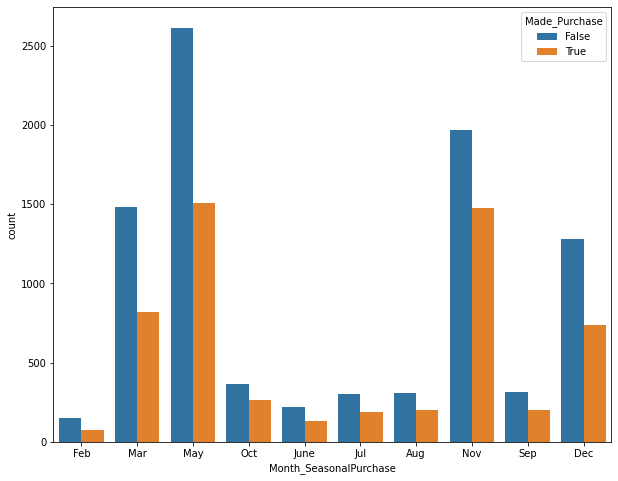

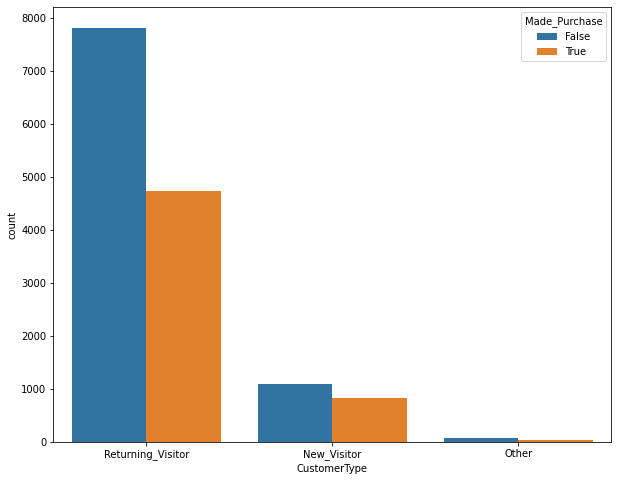

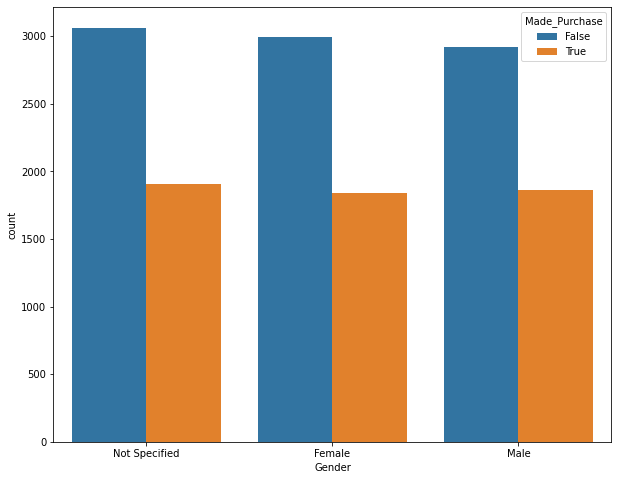

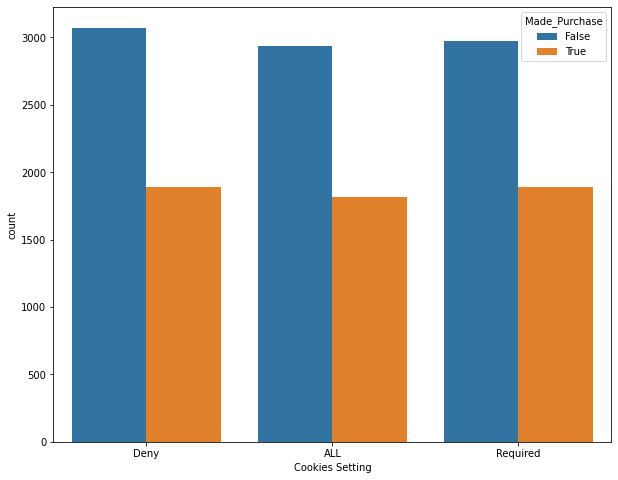

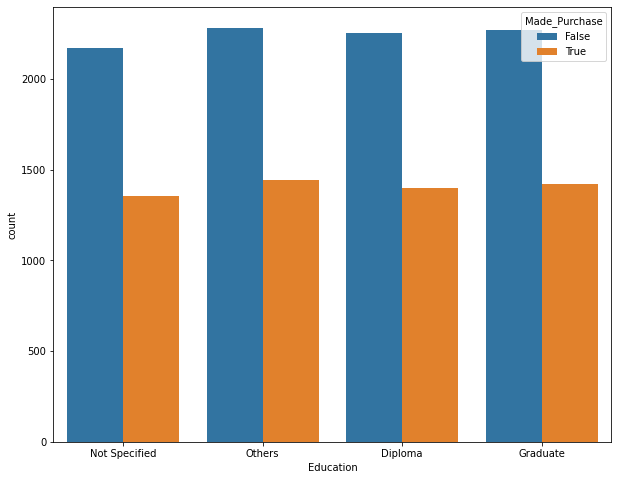

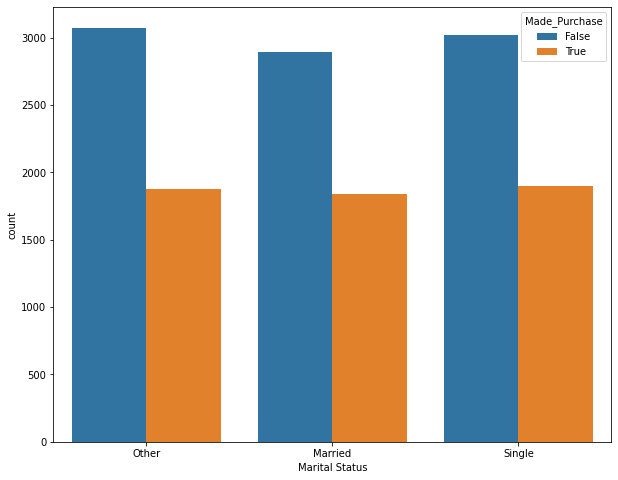

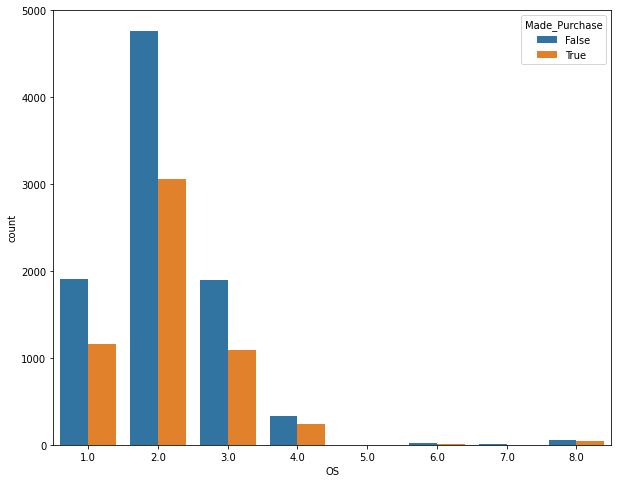

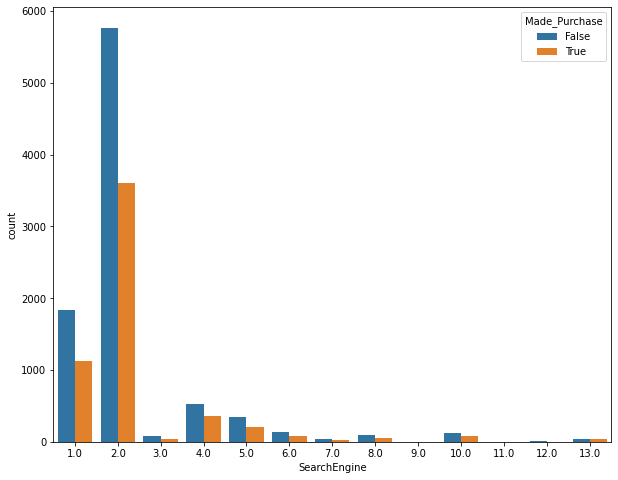

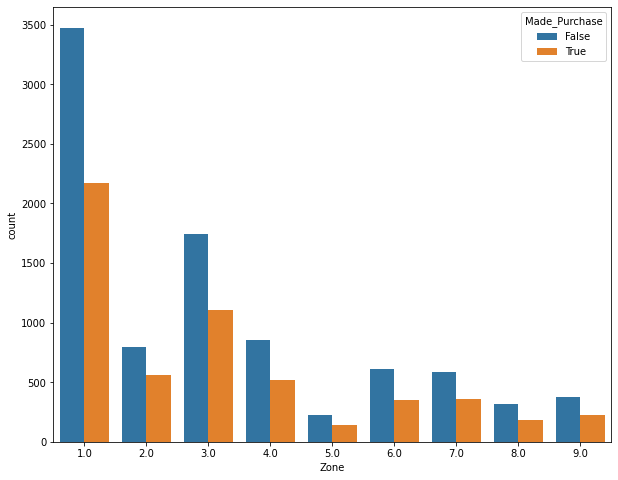

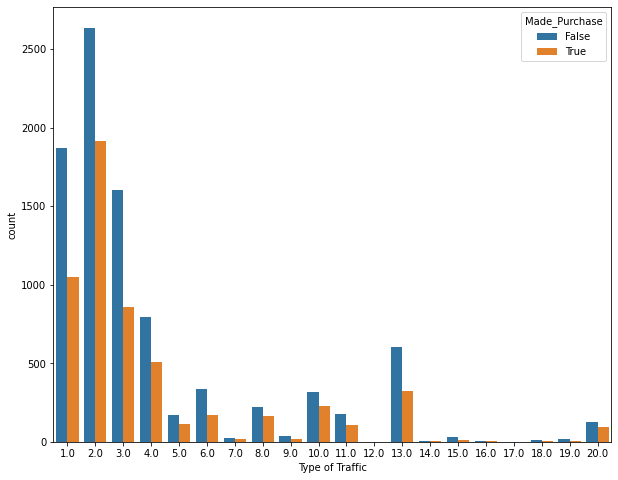

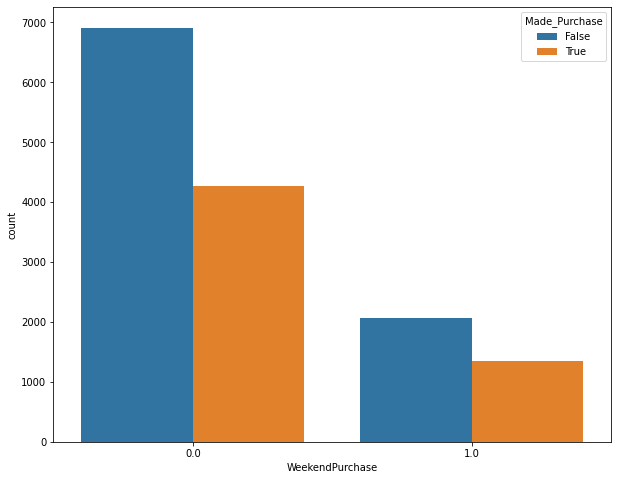

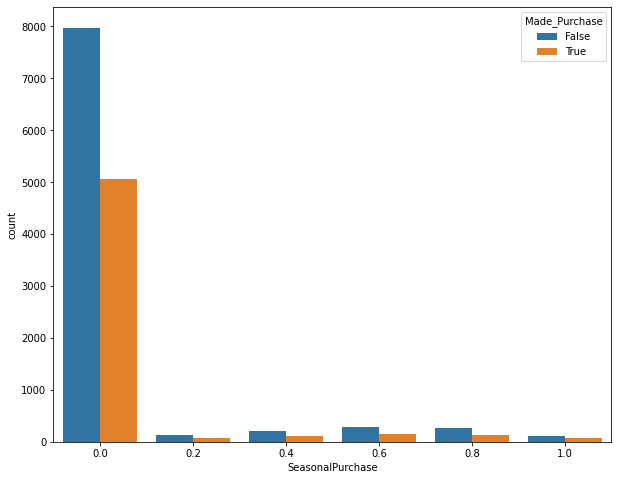

In [14]:
for cat in cat_cols_0:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.countplot(x = cat, hue='Made_Purchase', data = train)
    plt.show()

In [15]:
"""
for cat in ['Visited_HomePage', 'Visited_LandingPage','Bounced']:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.countplot(x = cat, hue='Made_Purchase', data = train)
    plt.show()
"""

"\nfor cat in ['Visited_HomePage', 'Visited_LandingPage','Bounced']:\n    fig, ax = plt.subplots(figsize=(10, 8))\n    sns.countplot(x = cat, hue='Made_Purchase', data = train)\n    plt.show()\n"

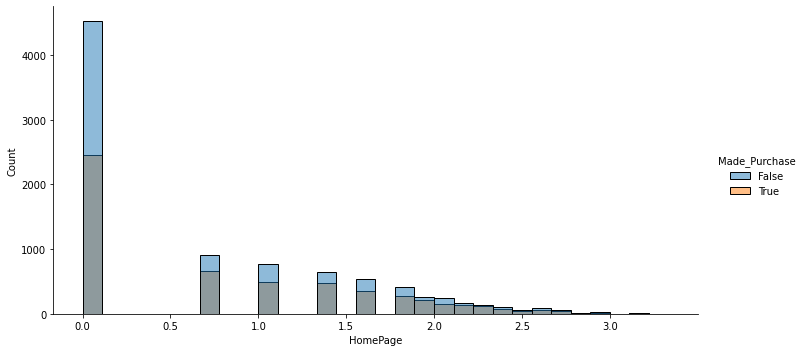

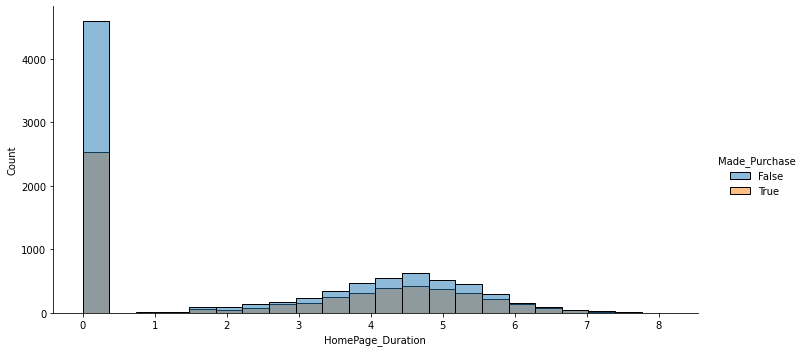

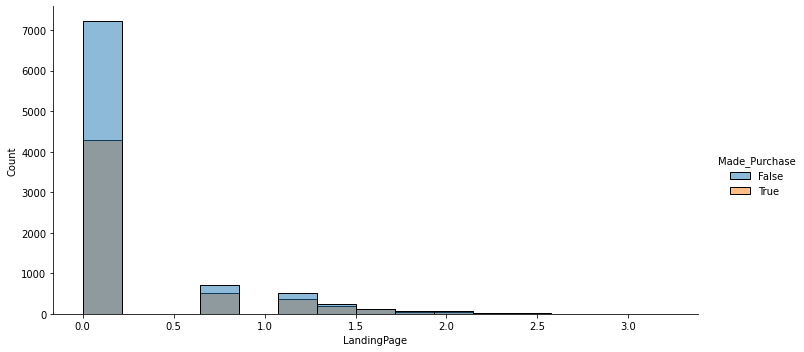

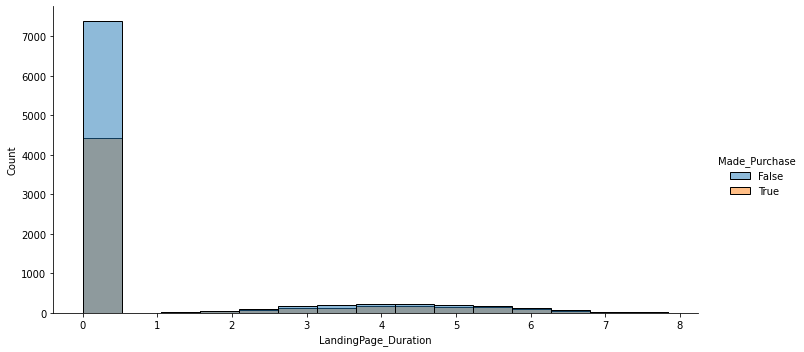

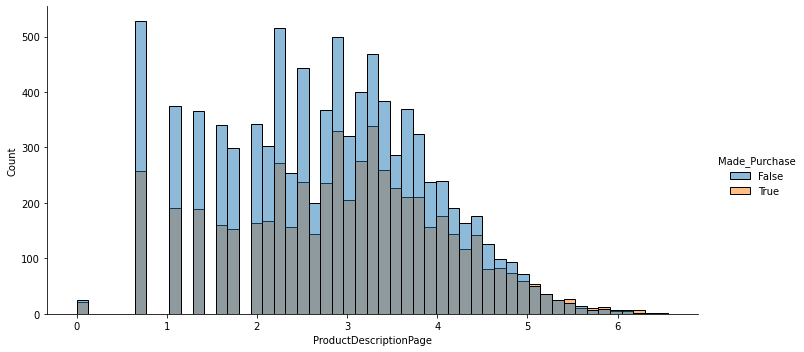

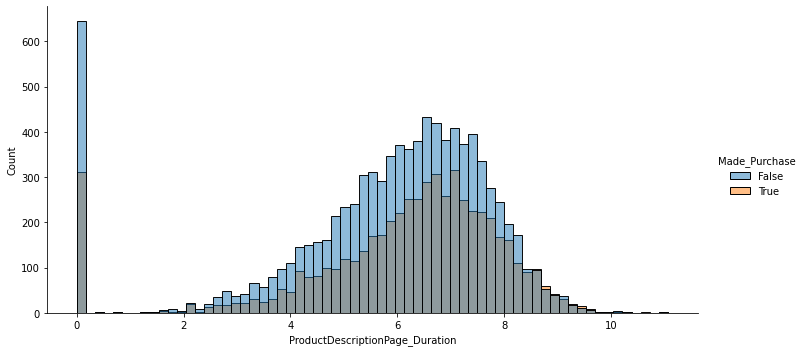

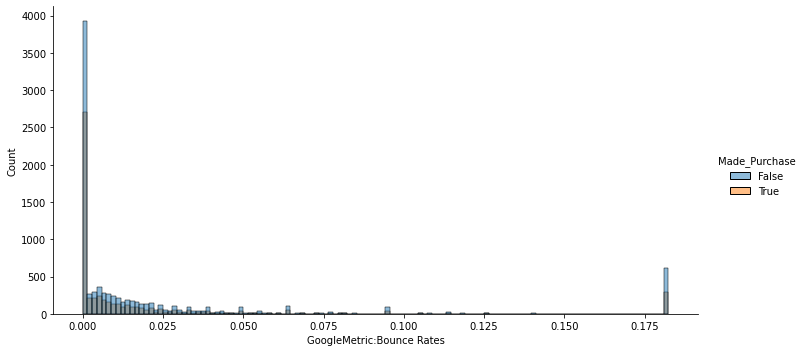

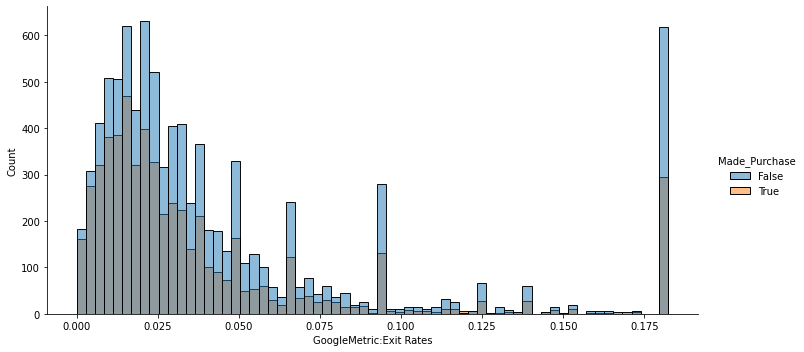

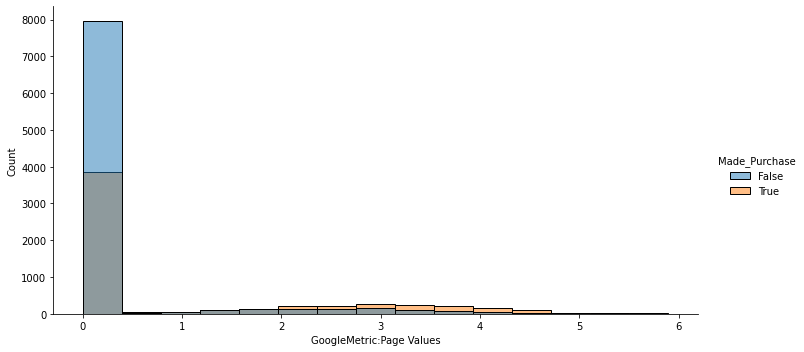

In [16]:
for num in num_cols_0:
    sns.displot(data=train,x=np.log1p(train[num]),hue='Made_Purchase', height=5, aspect=2)
    plt.show()

In [17]:
contingency_table = pd.crosstab(train['SeasonalPurchase'], train['Month_SeasonalPurchase'])
print(contingency_table)

Month_SeasonalPurchase  Aug   Dec  Feb  Jul  June   Mar   May   Nov  Oct  Sep
SeasonalPurchase                                                             
0.0                     505  1995  128  483   347  2280  2636  3408  623  507
0.2                       0     0   18    0     0     0   197     0    0    0
0.4                       0     0   29    0     0     0   278     0    0    0
0.6                       0     0   20    0     0     0   400     0    0    0
0.8                       0     0   19    0     0     0   375     0    0    0
1.0                       0     0    6    0     0     0   183     0    0    0


<AxesSubplot:>

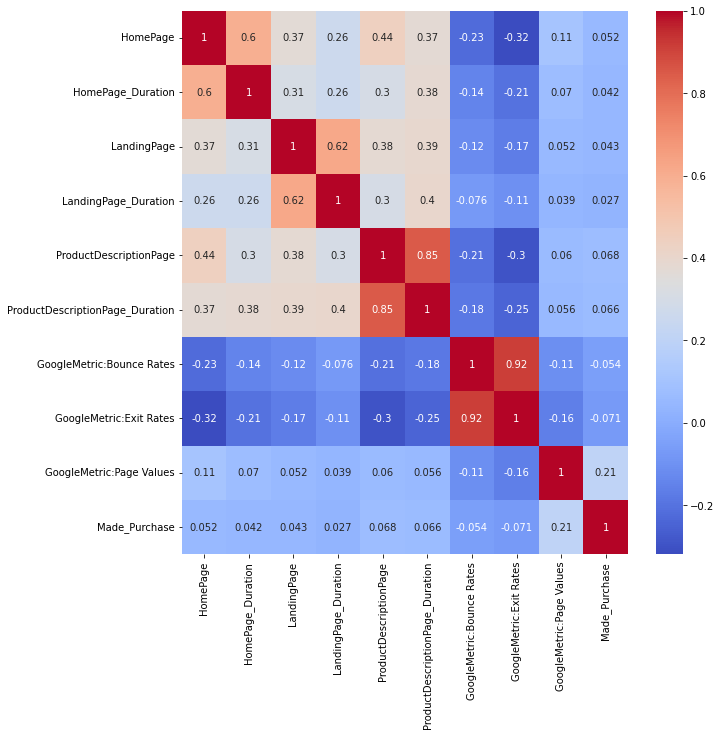

In [18]:
corr_matrix = train[num_cols_0 + ['Made_Purchase']].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Data Preprocessing

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,
                                                    random_state=42, stratify=labels)

In [20]:
x_train.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,10218.000000,10218.000000,10202.000000,10213.000000,10223.000000,10197.000000,10209.000000,10220.000000,10222.000000,10207.000000,10211.000000,10223.000000,10226.000000,10219.000000,10231.000000
mean,2.246624,79.603921,0.489512,33.300498,31.400567,1180.821874,0.023578,0.044749,4.784531,0.065916,2.124572,2.350484,3.181889,4.094432,0.242205
std,3.269508,180.835788,1.260088,141.058274,43.643097,1942.337818,0.050214,0.050091,16.965793,0.205750,0.913472,1.704472,2.423675,4.039876,0.428439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.500000,0.000000,0.014492,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.000000,585.391667,0.003636,0.026488,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1435.772114,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,MinMaxScaler,MaxAbsScaler, FunctionTransformer, PowerTransformer,KBinsDiscretizer 

from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,f1_score

In [22]:
numeric_transformer = Pipeline(steps=[
                                ('imputer', KNNImputer(n_neighbors=10)),
                                ('scaler', PowerTransformer())
                    ])

In [23]:
numeric_encoder = Pipeline(steps=[
                            ('imputer',KNNImputer(n_neighbors=10)),
                            ('scaler', PowerTransformer()),
                            # ('encoder',KBinsDiscretizer(encode='ordinal',strategy='uniform',n_bins=10))
                ])
# num_cols_encode = ['GoogleMetric:Page Values']

In [24]:
# num_cols_0.remove('GoogleMetric:Page Values')

In [25]:
categorical_transformer_encoded = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('encoder', OneHotEncoder())
                                ])

In [26]:
categorical_transformer = Pipeline(steps=[
                            ('imputer', SimpleImputer(strategy='most_frequent'))
                        ])

In [27]:
preprocessor = ColumnTransformer(transformers=[
                                    ('num', numeric_transformer, num_cols_0),
                                    #('num_encoded',numeric_encoder,num_cols_encode),
                                    ('cat_encoded', categorical_transformer_encoded, cat_cols),
                                    ('cat', categorical_transformer, cat_cols_1)
                                ],
                                 remainder='passthrough'
                                )

# Model Creation

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, SequentialFeatureSelector, chi2
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import FunctionSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier, RUSBoostClassifier

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,15,10,5),solver='adam',
                     activation='identity', max_iter=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=50)
lr = LogisticRegression(solver='liblinear',penalty='l2', random_state=42)
ada = AdaBoostClassifier(random_state=42)
grad = GradientBoostingClassifier(random_state=684)
vot = VotingClassifier(estimators=[('knn',knn),('lr',lr)],voting='soft')

esc = EasyEnsembleClassifier(n_estimators=30)
bbc = BalancedBaggingClassifier()
brfc = BalancedRandomForestClassifier()
rus = RUSBoostClassifier()

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', PCA(n_components=13)),
                        ('classifier', vot)
                       ])

# Model Evaluation

              precision    recall  f1-score   support

       False       0.67      0.89      0.77      6345
        True       0.64      0.31      0.42      3966

    accuracy                           0.67     10311
   macro avg       0.66      0.60      0.59     10311
weighted avg       0.66      0.67      0.63     10311

Train 0.4107539409712677
              precision    recall  f1-score   support

       False       0.67      0.89      0.77      2720
        True       0.63      0.31      0.42      1700

    accuracy                           0.67      4420
   macro avg       0.65      0.60      0.59      4420
weighted avg       0.66      0.67      0.63      4420

Test 0.41643619122876335


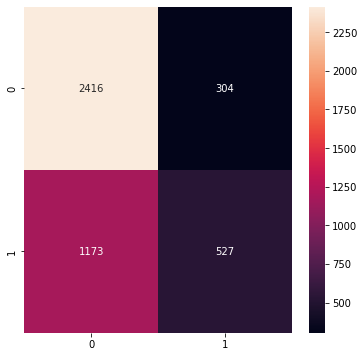

In [30]:

model.fit(x_train, y_train)

y_pred_0 = model.predict(x_train)
y_pred_1 = model.predict(x_test)

cr_train = classification_report(y_train, y_pred_0)
cr_test = classification_report(y_test, y_pred_1)

score_train = cross_val_score(model,x_train, y_train, scoring='f1').mean()
score_test = f1_score(y_test, y_pred_1)
print(cr_train)
print("Train", score_train)
print(cr_test)
print("Test", score_test)

cm = confusion_matrix(y_test, y_pred_1)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True, fmt='d')
plt.show()

y_pred = model.predict(test)


In [31]:
# 0.4556547619047619
# 0.4629059829059829
# Test 0.4228836490143023

# Hyperparameter Tuning

In [32]:
"""
from sklearn.model_selection import GridSearchCV

param_grid = {'pca__n_components': [1,2,3,4,5,6,7,8,9,10,11,12,13]
             }

f1_scorer = make_scorer(f1_score, average='binary')

grid_search = GridSearchCV(model, param_grid = param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\'pca__n_components\': [1,2,3,4,5,6,7,8,9,10,11,12,13]\n             }\n\nf1_scorer = make_scorer(f1_score, average=\'binary\')\n\ngrid_search = GridSearchCV(model, param_grid = param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)\n\ngrid_search.fit(x_train, y_train)\n\nprint("Best parameters:", grid_search.best_params_)\nprint("Best F1 score:", grid_search.best_score_)\n'

In [33]:
"""
best_model = grid_search.best_estimator_

best_model.fit(x_train, y_train)

y_pred_2 = best_model.predict(x_test)
cr_test = classification_report(y_test, y_pred_2)
print(f1_score(y_test, y_pred_2))

cm = confusion_matrix(y_test, y_pred_2)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True, fmt='d')
plt.show()


y_pred = best_model.predict(test)
"""

"\nbest_model = grid_search.best_estimator_\n\nbest_model.fit(x_train, y_train)\n\ny_pred_2 = best_model.predict(x_test)\ncr_test = classification_report(y_test, y_pred_2)\nprint(f1_score(y_test, y_pred_2))\n\ncm = confusion_matrix(y_test, y_pred_2)\nplt.rcParams['figure.figsize'] = (6, 6)\nsns.heatmap(cm, annot = True, fmt='d')\nplt.show()\n\n\ny_pred = best_model.predict(test)\n"

# Creating Submission File

In [34]:
sample = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv')

In [35]:
submission = pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id'] = [i for i in range(len(y_pred))]
submission['Made_Purchase'] = y_pred

submission.to_csv('submission.csv', index=False)


In [36]:
submission.shape

(6599, 2)

In [37]:
np.unique(y_pred, return_counts=True) 

(array([False,  True]), array([5406, 1193]))

In [38]:
# (array([False,  True]), array([5217, 1382])) - Rando->Smote
# (array([False,  True]), array([5327, 1272])) - Smote-> Rando
# (array([False,  True]), array([4845, 1754])) - Smote